In [3]:
import os
import sys
import tensorflow as tf

directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from NsgaII import Nsga_II
from utils.load_data import load_mnist
from CapsNet import CapsNet

(X_train, y_train), (X_test , y_test) = load_mnist(size=(5000, 3000))

In [4]:
import json
with open('../saved_ga/mnist-gpu1-hpc-3/solutions.json') as file:
    solutions = json.load(file)
    params = solutions['Solution 1']['params']

# params = {'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}

print(params)
NasCapsNet = CapsNet(**params)
NasCapsNet._name = 'NasCapsNet'
NasCapsNet.compile()
NasCapsNet.summary()

{'epochs': 6, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 13, 'dense_1': 4, 'dense_2': 7, 'epsilon': 0.08742299226403732, 'm_plus': 0.9456846674693228, 'm_minus': 0.14031781581101938, 'lambda_': 0.5465632334721983, 'alpha': 0.0006352825328991005, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}
Model: "NasCapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                              

In [5]:
NasCapsNet.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 6/6: 100%|██████████| 79/79 [00:15<00:00,  5.11it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 6 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.9544, 0.9796, 0.9872, 0.9922, 0.9942]),
 'loss': ListWrapper([0.46047414653003216, 0.2712258603423834, 0.2452863845974207, 0.23331446573138237, 0.22597643546760082]),
 'val_accuracy': ListWrapper([0.928, 0.951, 0.963, 0.9633333333333334, 0.969]),
 'val_loss': ListWrapper([0.32836205791682005, 0.2801567083224654, 0.2696400973945856, 0.2612742828205228, 0.254619843326509])}

In [6]:
n_rounds = 100

import time

caps_nas_inv_time = []
for i in range(n_rounds):
    start = time.time()
    NasCapsNet.predict(X_test)
    end = time.time()
    caps_nas_inv_time.append((end - start) / len(X_test) * 1000)
caps_nas_inv_time

[0.6057189305623373,
 0.6052979628245035,
 0.597787618637085,
 0.6174413363138834,
 0.5882387161254883,
 0.6029066244761149,
 0.5817926724751791,
 0.5862083435058594,
 0.5810276667277018,
 0.6030553976694742,
 0.5802923043568929,
 0.5938119888305664,
 0.618550697962443,
 0.5848603248596191,
 0.5871426264444988,
 0.5985056559244791,
 0.5799740155537924,
 0.6006136735280355,
 0.6065726280212402,
 0.5826389789581299,
 0.5821083386739094,
 0.6245869795481364,
 0.6016240119934082,
 0.5924396514892578,
 0.5860933462778727,
 0.5849549770355225,
 0.603920062383016,
 0.6019166310628256,
 0.6037820180257161,
 0.600757916768392,
 0.6191989580790201,
 0.6011472543080647,
 0.5808656215667725,
 0.6022436618804932,
 0.5975183645884196,
 0.6019840240478516,
 0.5972533226013184,
 0.580634355545044,
 0.6013229688008627,
 0.6319223244984944,
 0.593350330988566,
 0.5927712917327881,
 0.5898396968841553,
 0.5925163427988688,
 0.5932045777638754,
 0.6040759881337484,
 0.5906896591186523,
 0.5835487047831217

In [7]:
import numpy as np
np.mean(caps_nas_inv_time)

0.5972735134760538

In [8]:
{"epochs": 6,
 "r": 2,
 "no_of_conv_kernels": 64,
 "secondary_capsule_vector": 13,
 "dense_1": 4,
 "dense_2": 7,
 "epsilon": 0.08742299226403732,
 "m_plus": 0.9456846674693228,
 "m_minus": 0.14031781581101938,
 "lambda_": 0.5465632334721983,
 "alpha": 0.0006352825328991005,
 "no_of_primary_capsules": 32,
 "primary_capsule_vector": 8,
 "no_of_secondary_capsules": 10}

params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

BaselineCapsNetModel = CapsNet(**params)
BaselineCapsNetModel._name = 'BaselineCapsNetModel'
BaselineCapsNetModel.compile()
BaselineCapsNetModel.summary()

Model: "BaselineCapsNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [9]:
BaselineCapsNetModel.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 8/10: 100%|██████████| 79/79 [00:25<00:00,  3.11it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 8 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.9526, 0.9766, 0.9888, 0.9918, 0.9958, 0.9966, 0.9988]),
 'loss': ListWrapper([0.3458697581663728, 0.0872035336215049, 0.05712175043299794, 0.04140099044889212, 0.030325146508403122, 0.02294999430887401, 0.015874426753725857]),
 'val_accuracy': ListWrapper([0.9203333333333333, 0.9483333333333334, 0.961, 0.9623333333333334, 0.9636666666666667, 0.9643333333333334, 0.965]),
 'val_loss': ListWrapper([0.14552525244653225, 0.1044716453179717, 0.07804199703969061, 0.07183640263974667, 0.06559029570780694, 0.06336242659017444, 0.05911740590818226])}

In [10]:
n_rounds = 100

import time

caps_inv_time = []
for i in range(n_rounds):
    start = time.time()
    BaselineCapsNetModel.predict(X_test)
    end = time.time()
    caps_inv_time.append((end - start) / len(X_test) * 1000)

In [11]:
caps_inv_time

[0.9813570181528726,
 0.9681173165639242,
 1.0329396724700928,
 1.0030336380004883,
 1.0037140846252441,
 1.016104300816854,
 0.994131565093994,
 1.084496021270752,
 0.976413329442342,
 0.9814713795979818,
 0.9745690822601318,
 0.9751902421315511,
 0.9874033133188884,
 0.9799316724141439,
 0.973969300587972,
 0.9734866619110107,
 0.976676066716512,
 0.9670027097066243,
 1.0053436756134033,
 0.9685053825378418,
 0.9690550963083904,
 0.9737280209859213,
 0.9688746134440104,
 0.9941799640655518,
 0.9760422706604004,
 0.9701470534006754,
 1.025983969370524,
 0.9875323772430421,
 0.9715329011281332,
 1.064915657043457,
 1.0335602760314941,
 0.9906293551127117,
 1.0354560216267903,
 1.0096166133880615,
 1.02818497021993,
 0.9986910025278728,
 0.9959007104237874,
 0.9808923403422037,
 0.9951616923014324,
 1.009836753209432,
 0.9860820770263672,
 0.9764336744944254,
 0.9836303393046062,
 0.98225736618042,
 0.9778476556142173,
 1.0169445673624675,
 0.9844366709391276,
 0.9786756833394369,
 1.00

In [12]:
import numpy as np

np.mean(caps_inv_time)

0.9923480288187662

In [13]:
ConvNetModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
ConvNetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [14]:
ConvNetModel.compile(tf.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
tf_y_train = tf.keras.utils.to_categorical(y_train)
tf_y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
history = ConvNetModel.fit(X_train, tf_y_train, epochs=10, batch_size=32, validation_data=(X_test, tf_y_test))

Epoch 1/10
157/157 [==============================] - 1s 6ms/step - loss: 0.5239 - accuracy: 0.8552 - val_loss: 0.3246 - val_accuracy: 0.9017
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1995 - accuracy: 0.9428 - val_loss: 0.2359 - val_accuracy: 0.9293
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1177 - accuracy: 0.9660 - val_loss: 0.2092 - val_accuracy: 0.9340
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0695 - accuracy: 0.9794 - val_loss: 0.2127 - val_accuracy: 0.9293
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0486 - accuracy: 0.9874 - val_loss: 0.1773 - val_accuracy: 0.9463
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0355 - accuracy: 0.9908 - val_loss: 0.1721 - val_accuracy: 0.9440
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0245 - accuracy: 0.9944 - val_loss: 0.1867 - val_accuracy: 0.9420
Epoch 

In [16]:
n_rounds = 100

import time

cnn_inv_time = []
for i in range(n_rounds):
    start = time.time()
    ConvNetModel.predict(X_test)
    end = time.time()
    cnn_inv_time.append((end - start) / len(X_test) * 1000)

94/94 [==============================] - 0s 1ms/step


In [17]:
cnn_inv_time

[0.06554230054219563,
 0.04995536804199219,
 0.05234901110331217,
 0.050126632054646805,
 0.050013701121012374,
 0.05147306124369303,
 0.04983933766682943,
 0.05050802230834961,
 0.05031323432922363,
 0.04977893829345703,
 0.051508426666259766,
 0.05062437057495117,
 0.05023876825968424,
 0.05093089739481608,
 0.051378726959228516,
 0.05093773206075033,
 0.04894431432088216,
 0.05053170522054037,
 0.05138206481933594,
 0.050951878229777016,
 0.05000464121500651,
 0.05250771840413411,
 0.05343667666117351,
 0.05313626925150553,
 0.05508963267008464,
 0.050395965576171875,
 0.05107839902242025,
 0.050208330154418945,
 0.06301792462666829,
 0.05024401346842448,
 0.050318002700805664,
 0.05098334948221842,
 0.0499409834543864,
 0.049887339274088546,
 0.050900379816691085,
 0.051127990086873375,
 0.05050365130106608,
 0.049258629480997726,
 0.050900061925252274,
 0.05037776629130045,
 0.05182830492655436,
 0.05096030235290527,
 0.051820993423461914,
 0.04993065198262532,
 0.0505463282267252

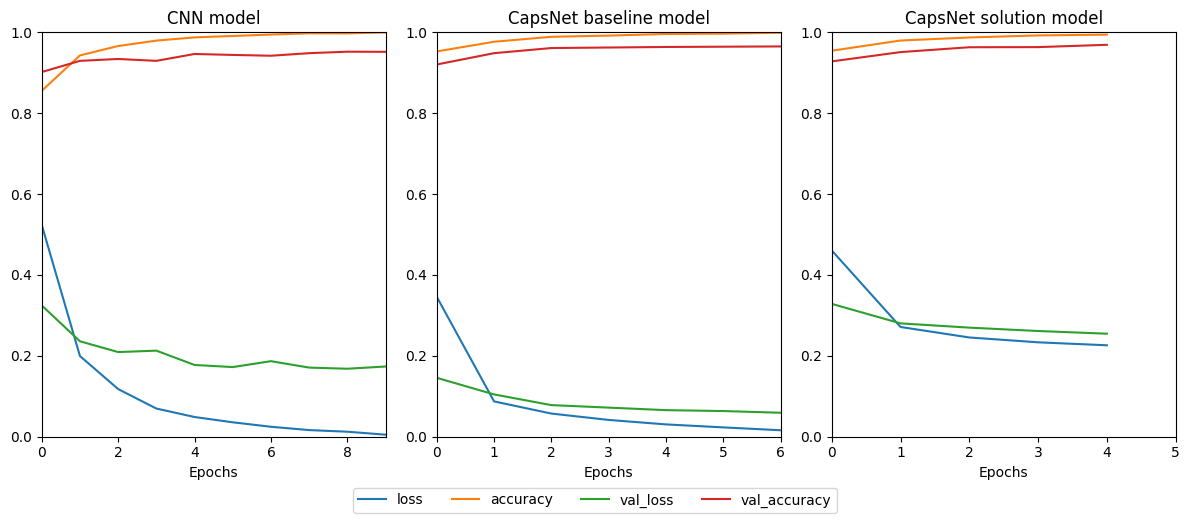

In [18]:
import matplotlib.pyplot as plt
import time
import pandas as pd

NasCapsNet.training_metrics = {
    'loss': NasCapsNet.training_metrics['loss'],
    'accuracy': NasCapsNet.training_metrics['accuracy'],
    'val_loss': NasCapsNet.training_metrics['val_loss'],
    'val_accuracy': NasCapsNet.training_metrics['val_accuracy'],
}

BaselineCapsNetModel.training_metrics = {
    'loss': BaselineCapsNetModel.training_metrics['loss'],
    'accuracy': BaselineCapsNetModel.training_metrics['accuracy'],
    'val_loss': BaselineCapsNetModel.training_metrics['val_loss'],
    'val_accuracy': BaselineCapsNetModel.training_metrics['val_accuracy'],
}

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

df_baseline = pd.DataFrame(history.history)
plot_baseline = df_baseline.plot(ax=axes[0], title="CNN model", legend=False)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 9)

df_capsnet = pd.DataFrame(BaselineCapsNetModel.training_metrics)
plot_capsnet = df_capsnet.plot(ax=axes[1], title="CapsNet baseline model", legend=False)  # Set legend=False here
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 6)

df_capsnet_nas = pd.DataFrame(NasCapsNet.training_metrics)
plot_capsnet_nas = df_capsnet_nas.plot(ax=axes[2], title="CapsNet solution model", legend=False)  # Set legend=False here
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 5)

axes[0].set_xlabel("Epochs")
axes[1].set_xlabel("Epochs")
axes[2].set_xlabel("Epochs")

# Show only one legend for all three plots
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)

plt.tight_layout()
plt.show()


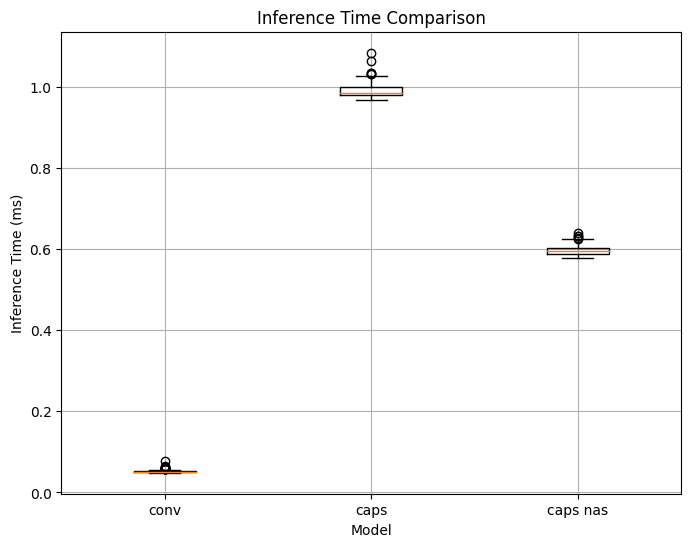

In [19]:
df = pd.DataFrame({
    "conv": cnn_inv_time,
    "caps": caps_inv_time,
    "caps nas": caps_nas_inv_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

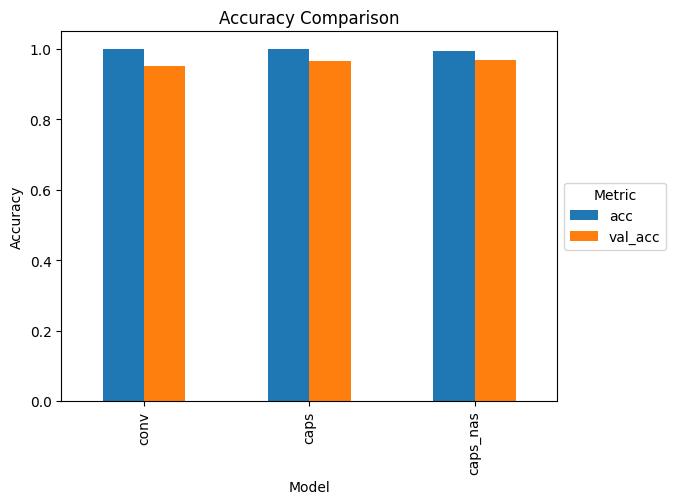

In [20]:
df = pd.DataFrame({
    'conv': {'acc': history.history['accuracy'][-1], 'val_acc': history.history['val_accuracy'][-1]},
    'caps': {'acc': BaselineCapsNetModel.training_metrics['accuracy'][-1], 'val_acc': BaselineCapsNetModel.training_metrics['val_accuracy'][-1]},
    'caps_nas': {'acc': NasCapsNet.training_metrics['accuracy'][-1], 'val_acc': NasCapsNet.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()